In [2]:
import Pkg; 

if split(pwd(),"/")[end] == "random_walk"
    cd(joinpath(@__DIR__, "../../../../MorphoMolMonteCarlo/"))
    Pkg.activate("Project.toml")
end

using MorphoMol

using CairoMakie
using Distances
using LinearAlgebra
using Random
using Rotations
using StaticArrays

In [11]:
T = 0.5
β = 1.0 / T

σ = 1.0

energy(x) = x[1]^2
perturbation(x) = x .+ randn() * σ
rwm = MorphoMol.Algorithms.RandomWalkMetropolis(energy, perturbation, β)
output = MorphoMol.Algorithms.SimulationStates(
    Vector{Float64}([]),
    Vector{Float64}([])
)
x = rand(1) .- 0.5
iterations = 100000
output = MorphoMol.Algorithms.simulate!(rwm, output, x, iterations);
output.αs[end]

0.50107f0

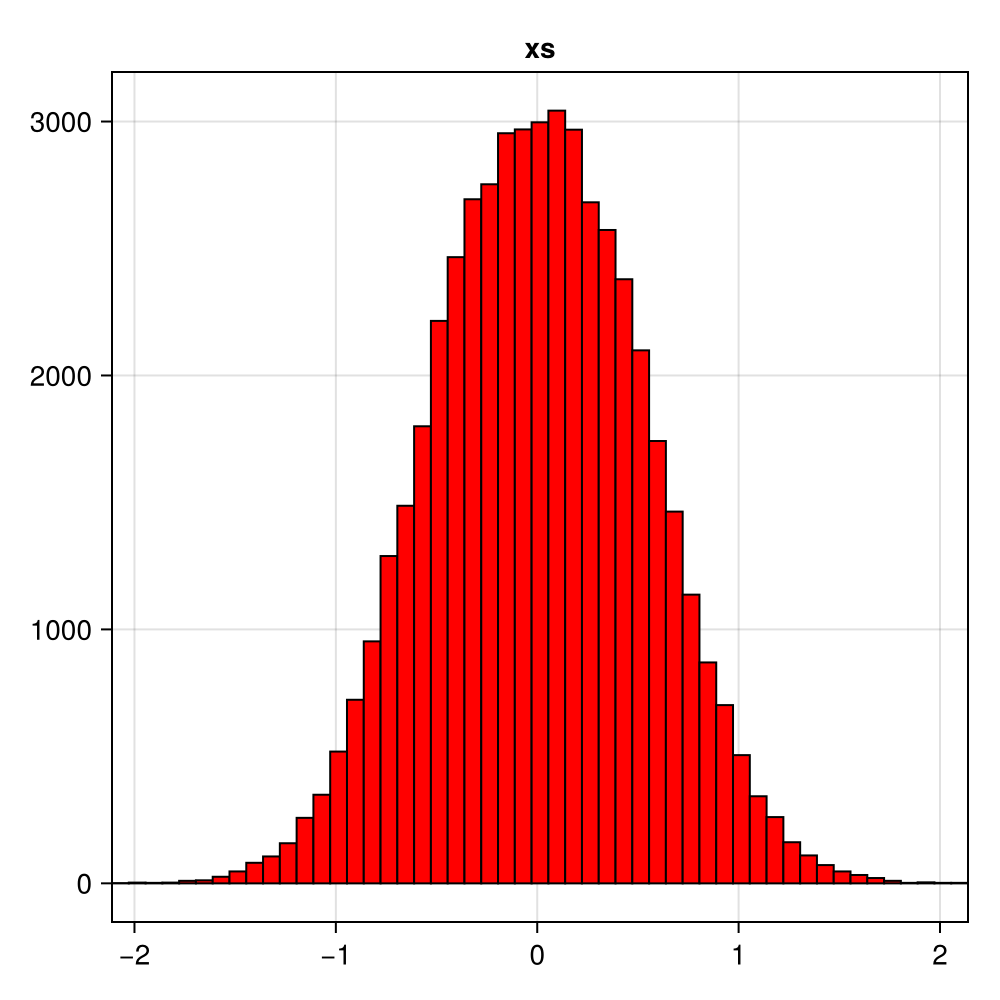

In [12]:
f = Figure(size = (500, 500))
bin_number = 51
xs = [e[1] for e in output.states]
hist(f[1, 1], xs, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "xs", limits = ((minimum(xs), maximum(xs)), nothing),))
f